# **1) Regressão Linear Múltipla**

Considere o conjunto de dados Auto1. O arquivo Auto.csv contém os dados para essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

## **(i)**

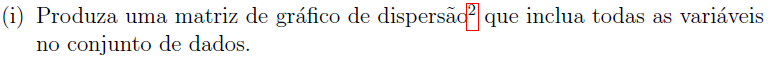

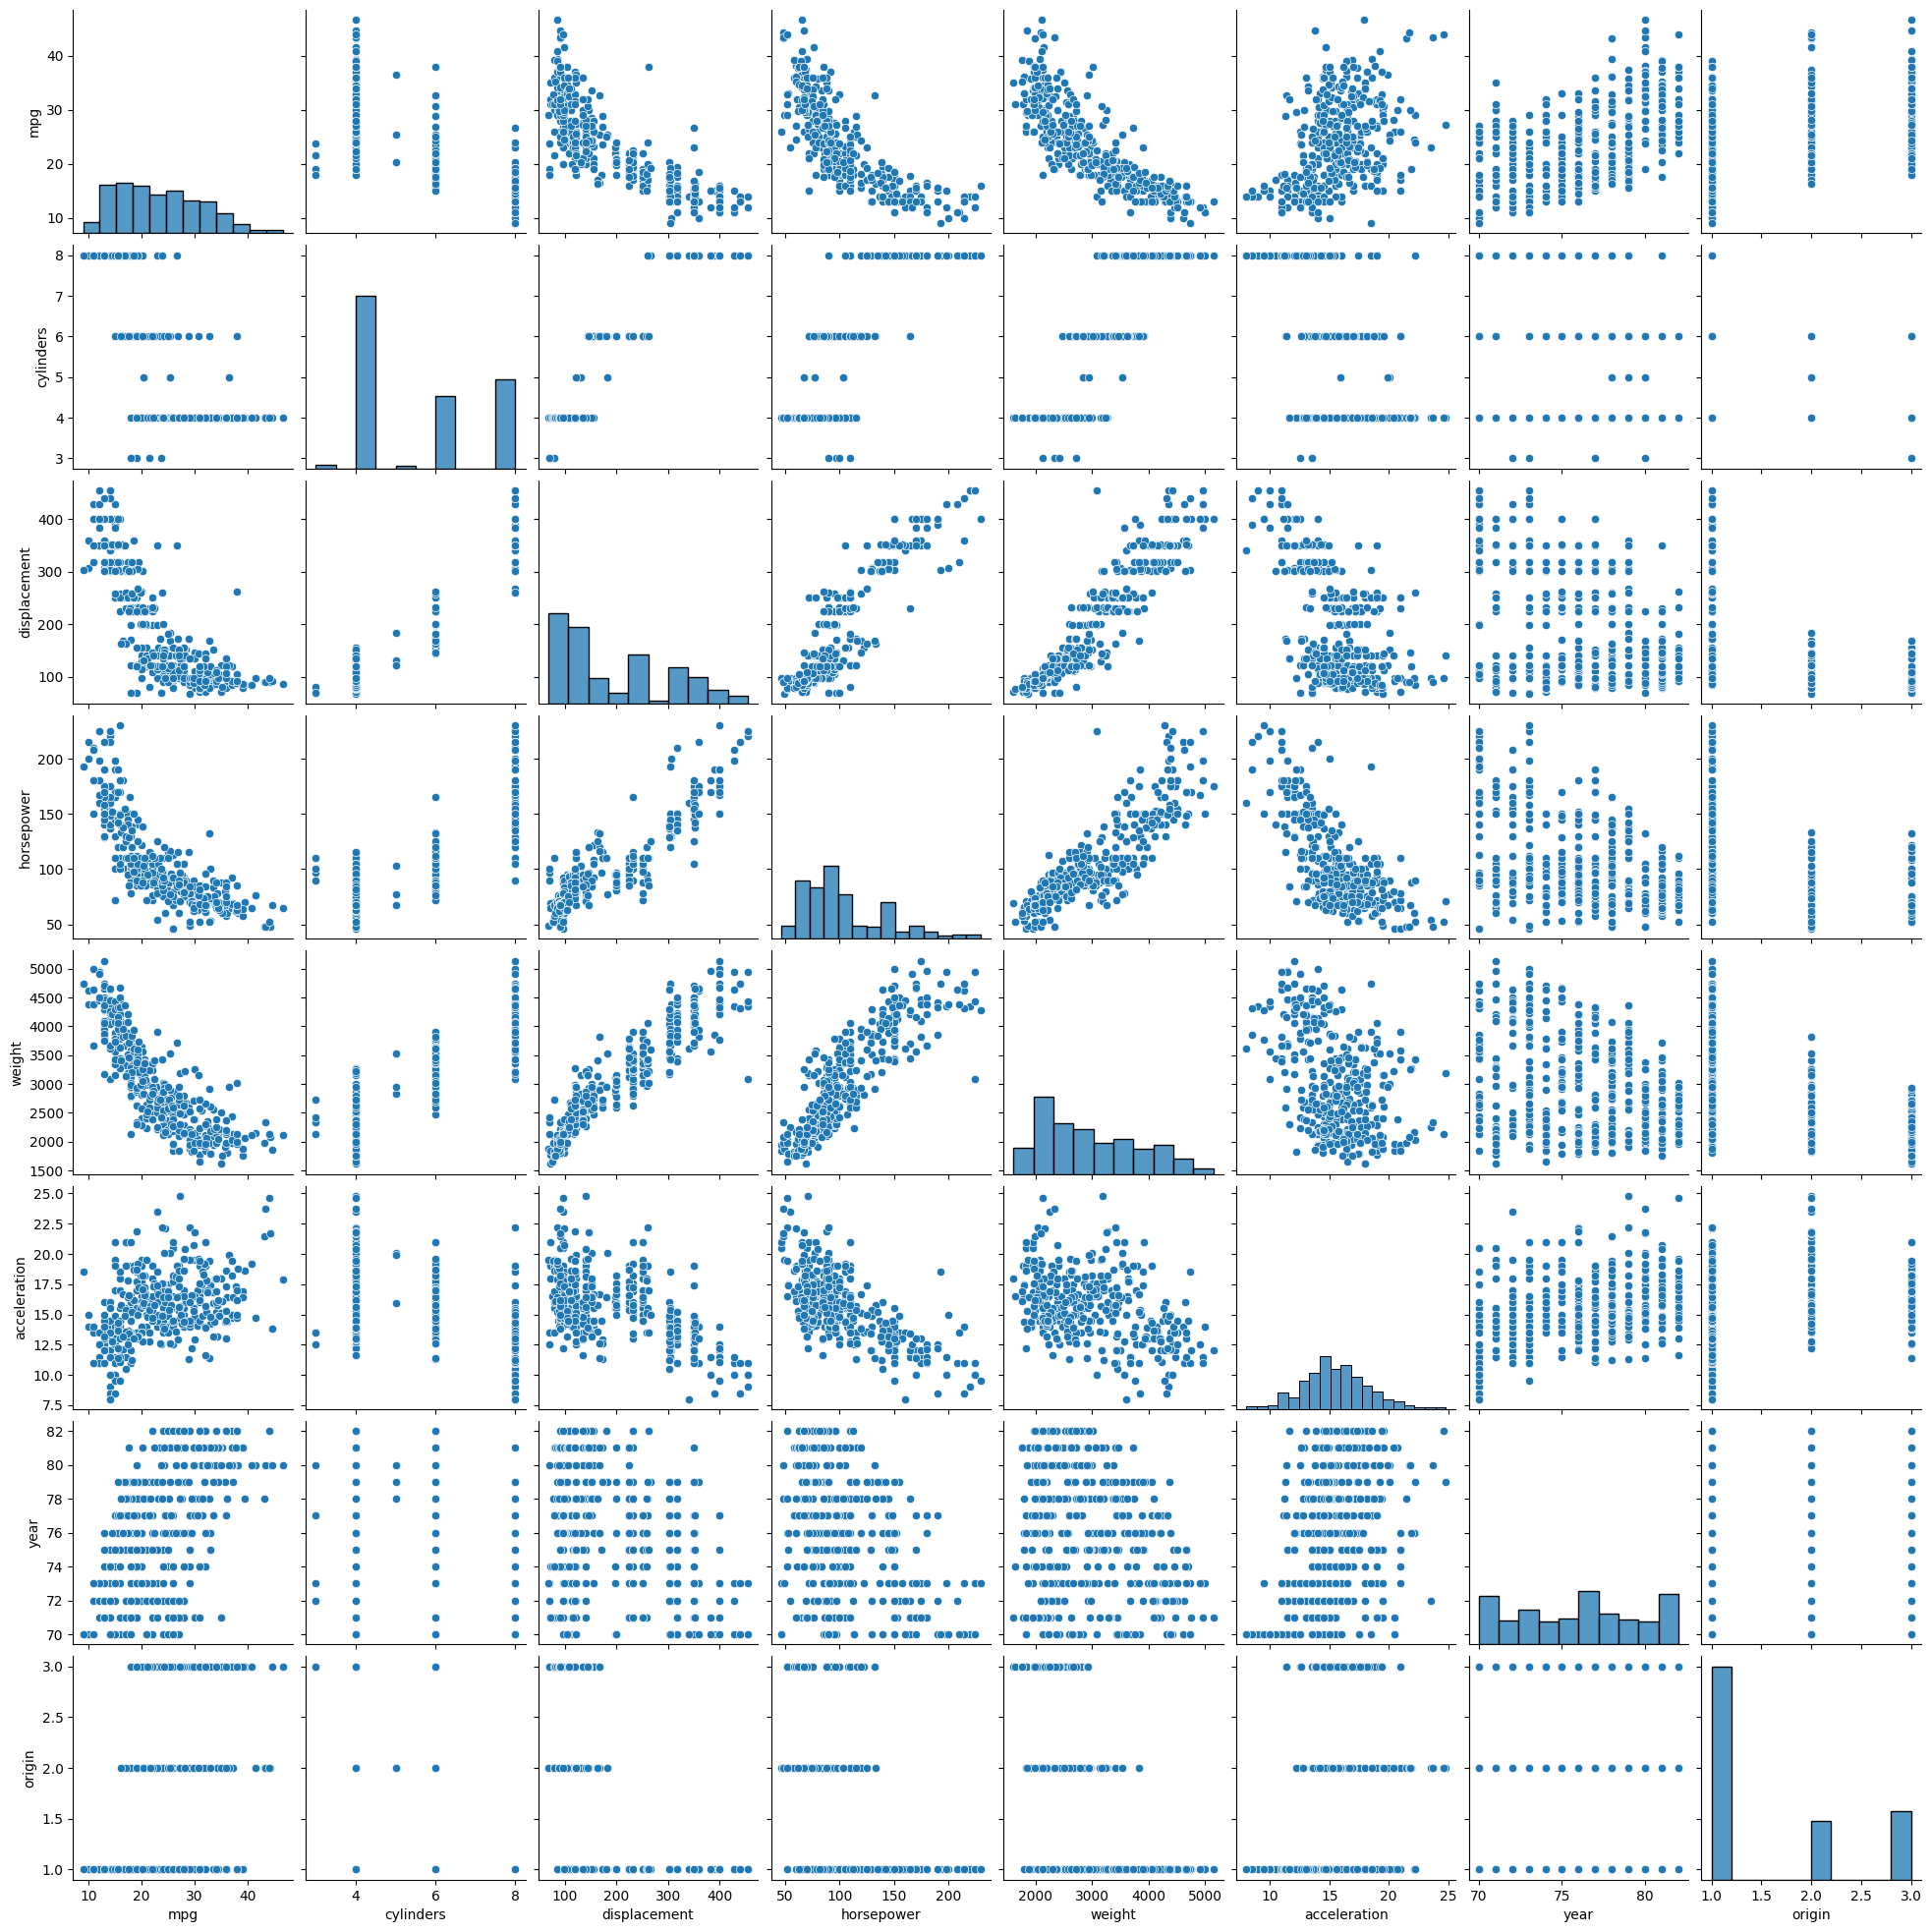

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Auto.csv')
df.drop(columns=['Unnamed: 0'])
vars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
sns.pairplot(df[vars])
plt.show()

**Explicação**

- Li o arquivo Auto.csv
- Fiz um array com o nome das variáveis.
- Plotei a matriz de dispersão com pairplot().

## **(ii)**

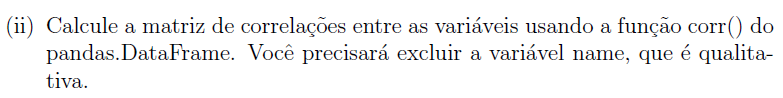

In [20]:
correlation_matrix = df[vars].corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**Explicação**

- Utilizei corr() para criar a matriz de correlações.

## **(iii)**

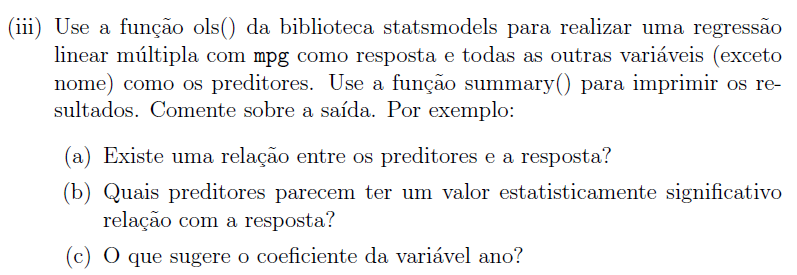

In [21]:
import statsmodels.api as sm

x = df[vars].drop(columns=['mpg'])
y = df['mpg']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.04e-139
Time:                        20:07:14   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**Explicação**

- Atribui todas as colunas menos mpg e nome para X
- Atribui mpg para Y
- Usei OLS e imprimi o resultado.

(a) **Existe uma relação entre os preditores e a resposta?**
- Sim, aproximadamente 81.8% da variação em mpg pode ser explicada pelas variáveis do modelo.

(b) **Quais preditores são estatisticamente significativos?**
- displacement, weight, year e origin têm p-values abaixo de 0.05, sendo relevantes.
- cylinders, horsepower e acceleration têm p-values acima de 0.05 e não são relevantes para prever mpg.

(c) **Qual é o efeito da variável 'year'?**
- Um aumento de um ano está associado a um acréscimo médio de 0.7508 unidades em mpg, mantendo as outras variáveis constantes. Isso indica que 'year' é significativo para prever o consumo de combustível.

## **(iv)**

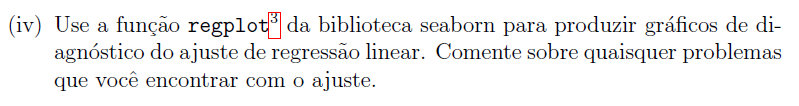

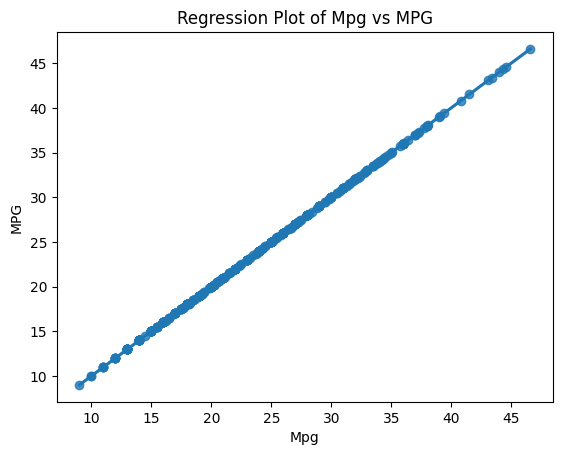

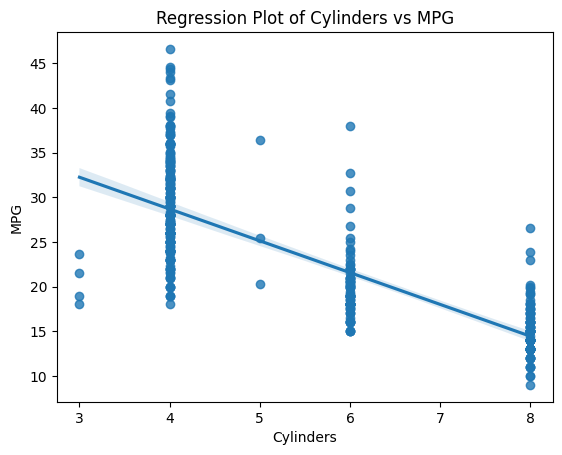

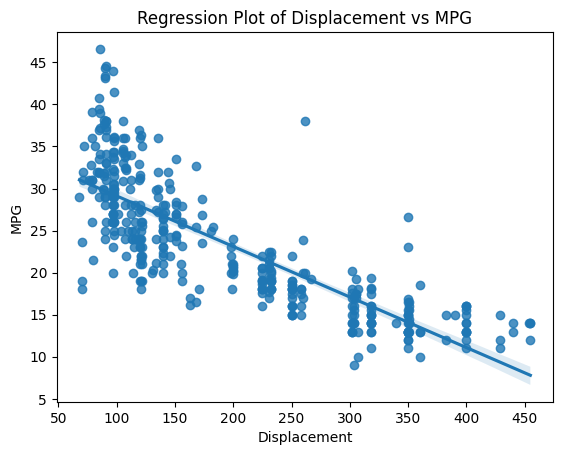

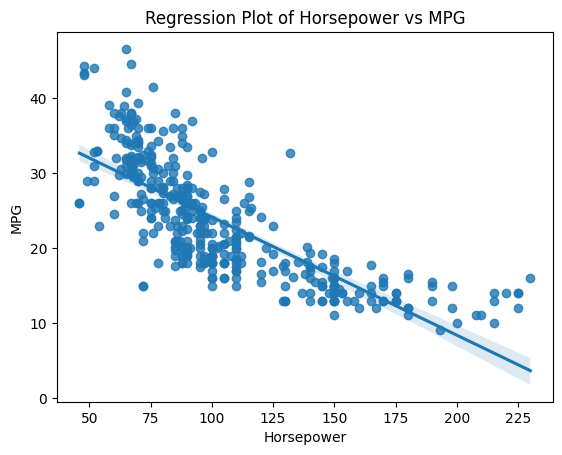

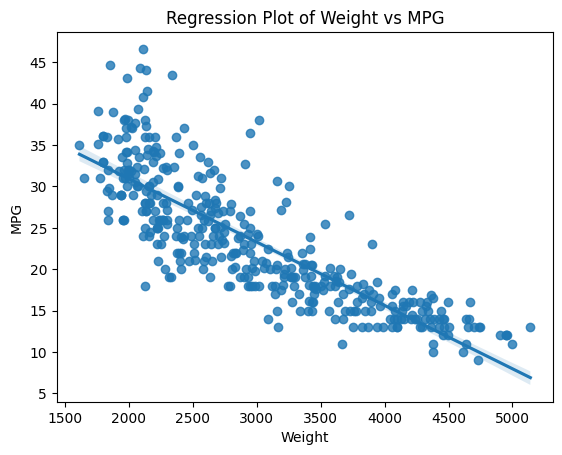

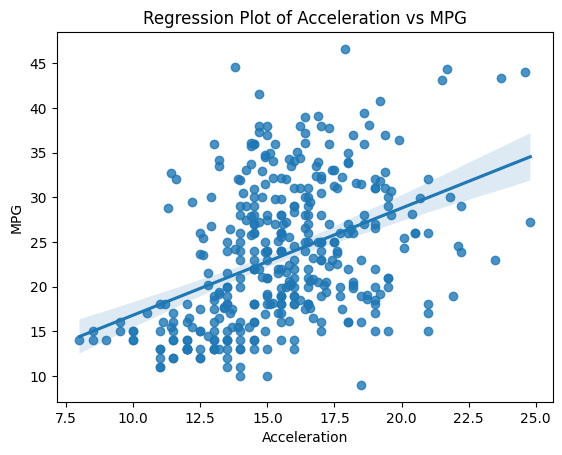

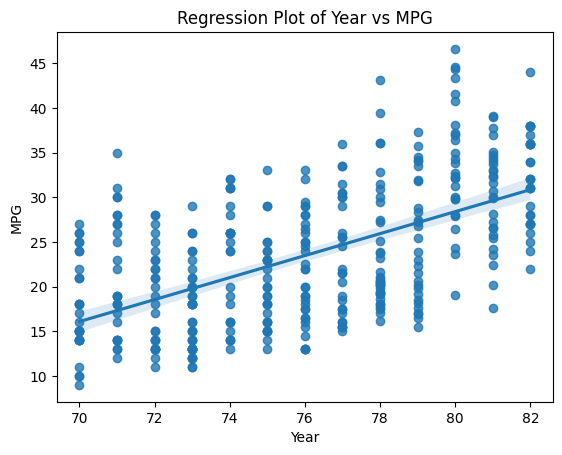

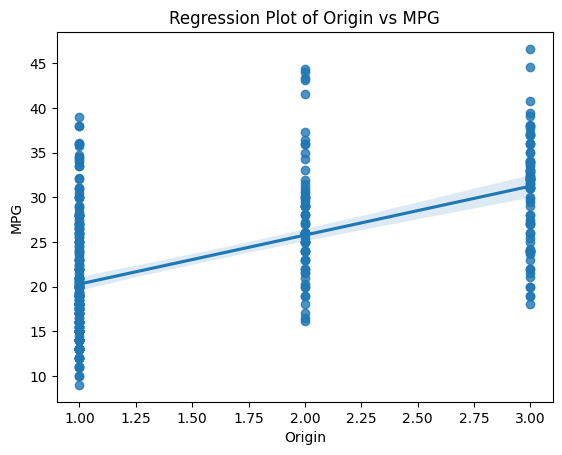

In [22]:
for var in vars:
    sns.regplot(x=var, y='mpg', data=df)
    plt.xlabel(var.capitalize())
    plt.ylabel('MPG')
    plt.title(f'Regression Plot of {var.capitalize()} vs MPG')
    plt.show()

**Explicação**

- Criei gráficos de regressão de mpg com todas as outras variáveis numéricas de auto.csv

# **2) Consumo de álcool x taxa de mortalidade**



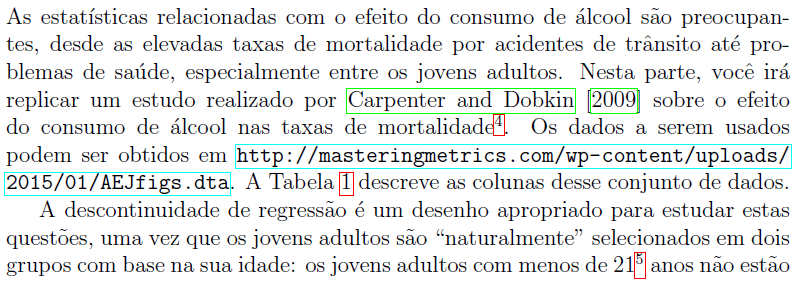
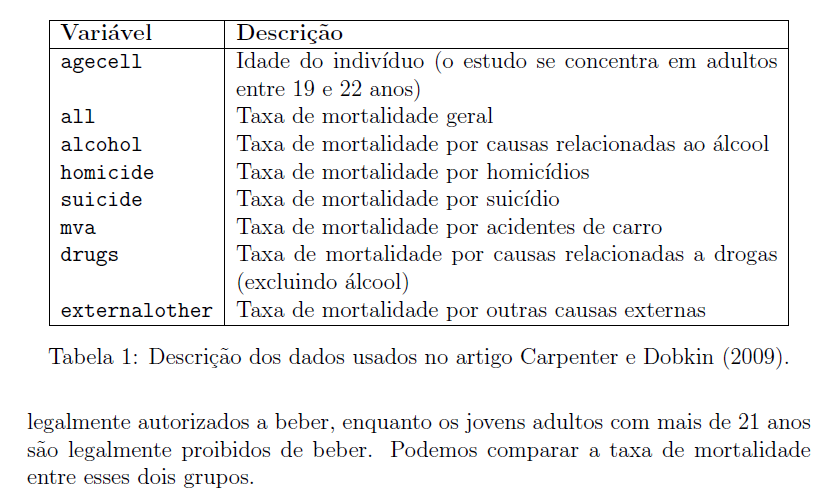

## **(i)**

Reproduza o gráfico apresentado na Figura 3 do estudo supra-mencionado.

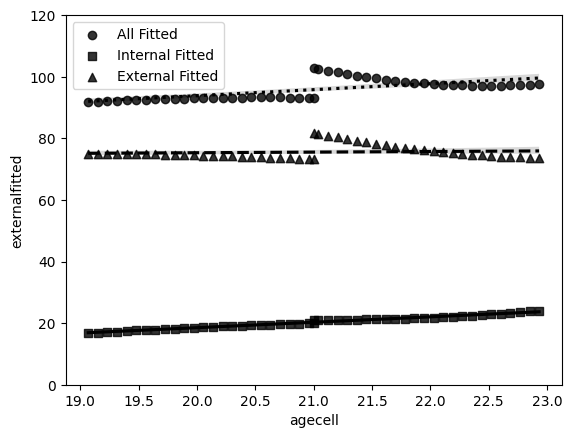

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_stata('AEJfigs.dta')

sns.regplot(x='agecell', y='allfitted', data=df, marker='o', label='All Fitted', color='black', line_kws={'linestyle': ':'})
sns.regplot(x='agecell', y='internalfitted', data=df, marker='s', label='Internal Fitted', color='black', line_kws={'linestyle': '-'})
sns.regplot(x='agecell', y='externalfitted', data=df, marker='^', label='External Fitted', color='black', line_kws={'linestyle': '--'})

plt.ylim(0, 120)

plt.legend(loc='best')
plt.show()

**Explicação**

- Criei o gráfico semelhante ao do artigo, usando os dados disponíveis em AEJfigs.dta e os markers

## **(ii)**

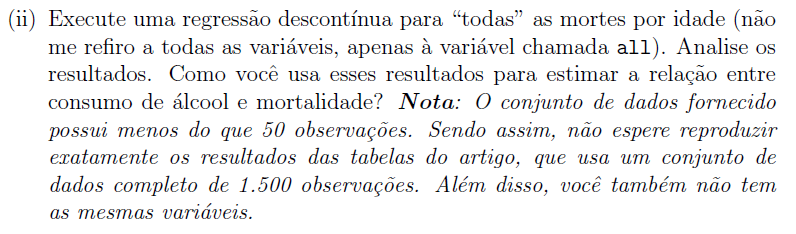

In [24]:
import statsmodels.api as sm
X = df['agecell']
X = sm.add_constant(X)
Y = df['all']

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                nan
Time:                        20:07:17   Log-Likelihood:                    nan
No. Observations:                  50   AIC:                               nan
Df Residuals:                      48   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

**Explicação**

## **(iii)**

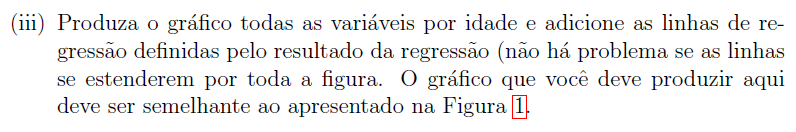

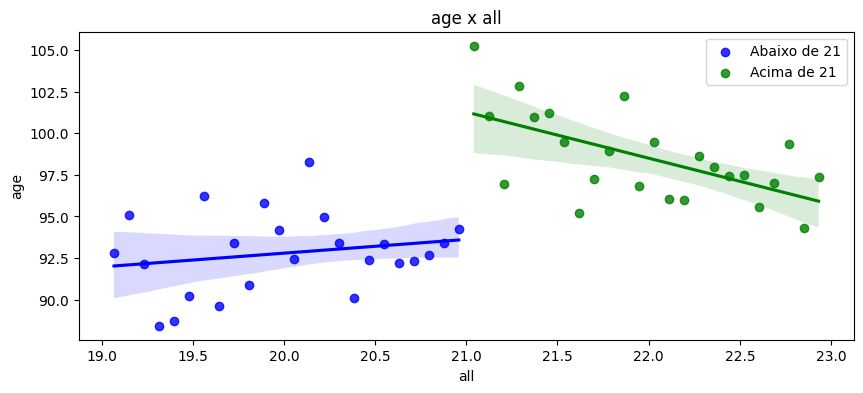

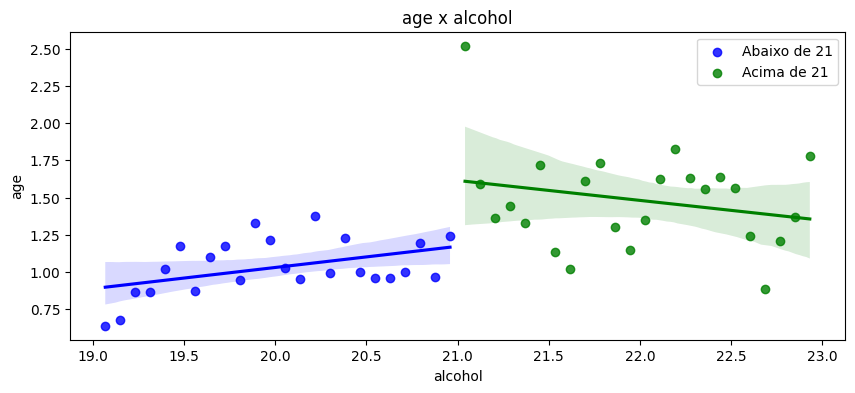

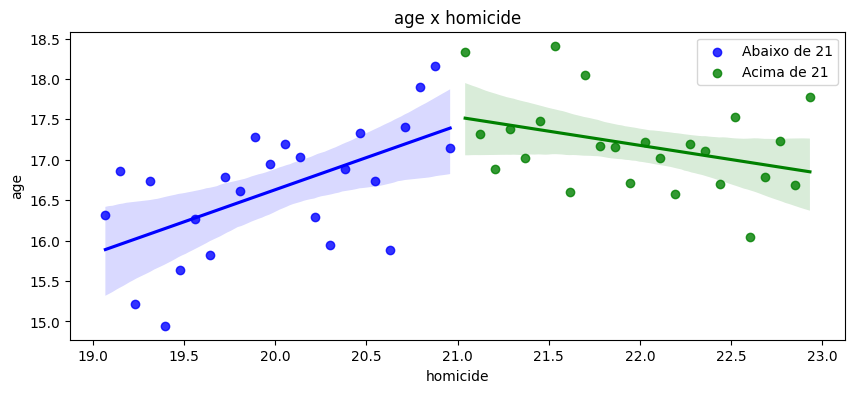

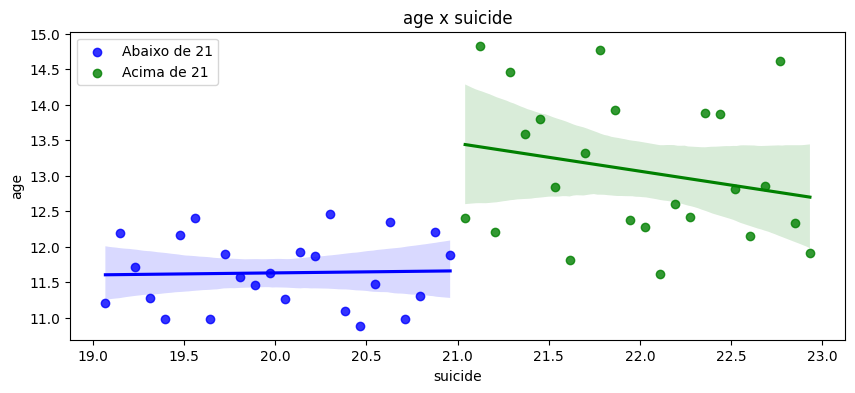

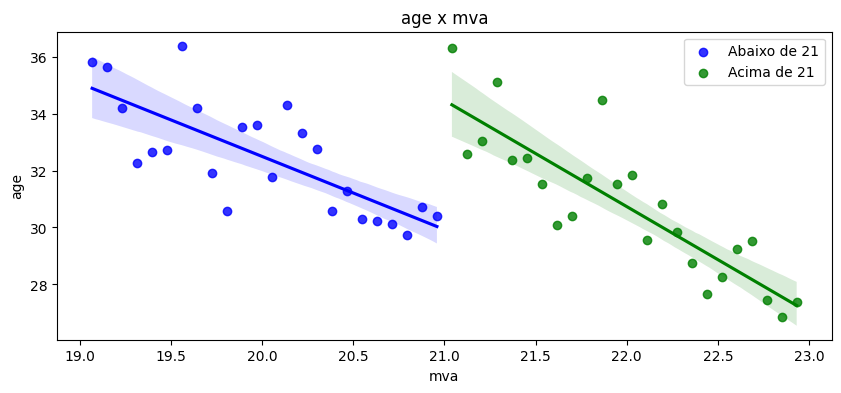

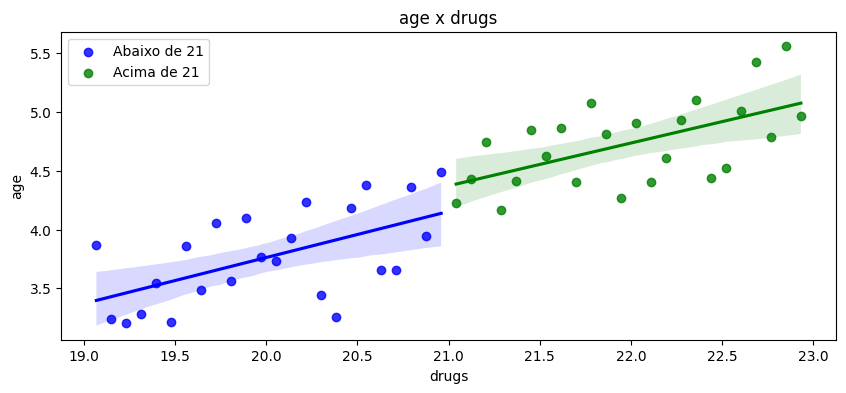

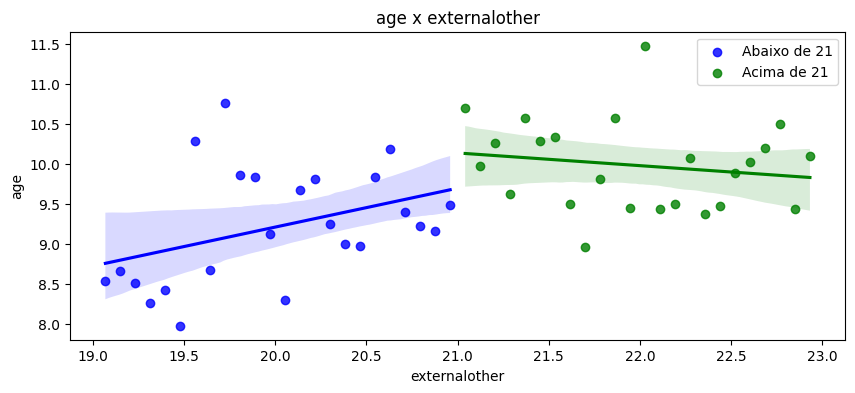

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data_above_21 = df[df['agecell'] > 21]
data_below_21 = df[df['agecell'] <= 21]

variaveis = ['all', 'alcohol', 'homicide', 'suicide', 'mva', 'drugs', 'externalother']

for var in variaveis:
    fig = plt.subplots(figsize=(10, 4))

    # Abaixo de 21 anos
    sns.regplot(data=data_below_21, x='agecell', y=var, label='Abaixo de 21', color='blue')

    # Acima de 21 anos
    sns.regplot(data=data_above_21, x='agecell', y=var, label='Acima de 21', color='green')

    plt.xlabel(var)
    plt.ylabel('age')
    plt.title(f'age x {var}')
    plt.legend()
    plt.show()

**Explicação**

- Separei os dados em dois conjuntos: um para idades acima de 21 anos e outro para idades abaixo ou iguais a 21 anos.
- Defini uma lista de variáveis chamada variaveis que contém os nomes das variáveis que serão usadas no gráfico.
- Em um loop for, percorri cada variável na lista variaveis.
- Para cada variável, criei uma figura para o gráfico.
- Usei sns.regplot duas vezes para plotar as regressões lineares para cada grupo de idade (acima e abaixo de 21 anos) em relação à variável específica.
- Adicionei rótulos nos eixos x e y, bem como um título para cada gráfico.
- Usei plt.legend() para adicionar uma legenda aos gráficos, identificando os grupos de idade.
- Por fim, usei plt.show() para exibir cada gráfico individualmente.

# **3) Salário mínimo x taxa de empregos**

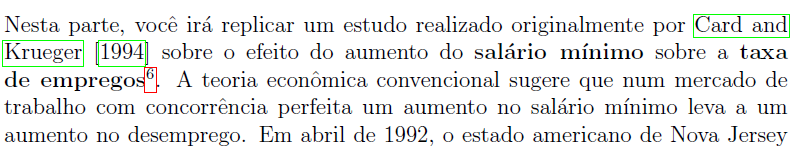
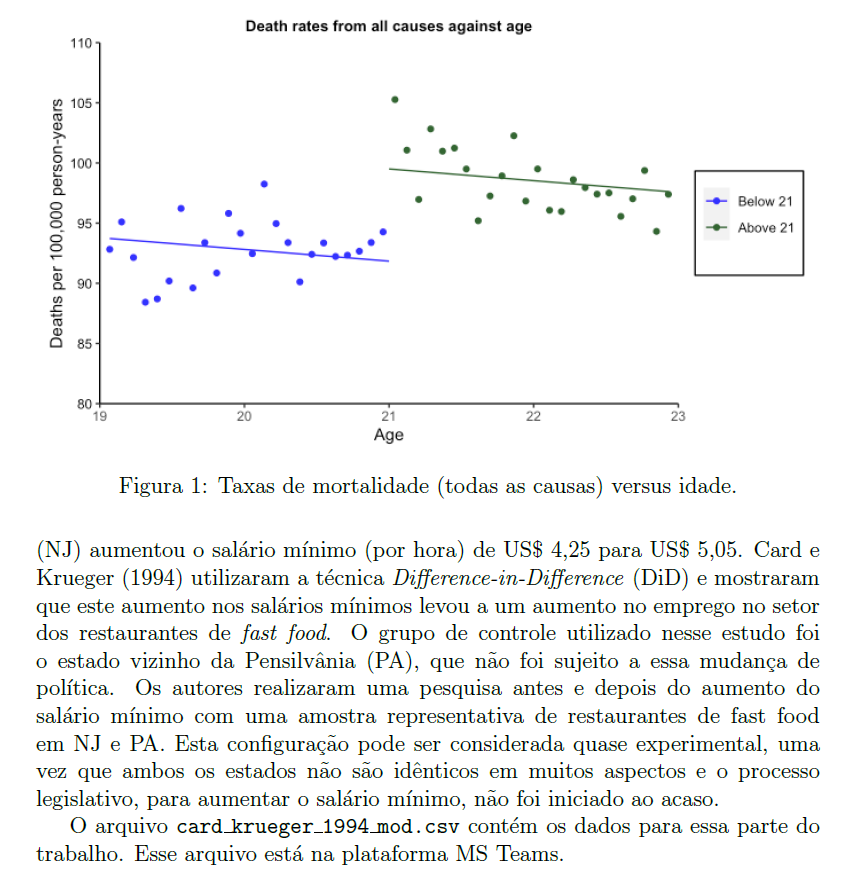

## **(i)**

Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.

In [26]:
df = pd.read_csv('card_krueger_1994_mod.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   820 non-null    int64  
 1   bonus        410 non-null    object 
 2   chain        820 non-null    object 
 3   co_owned     820 non-null    object 
 4   date         410 non-null    object 
 5   empft        802 non-null    float64
 6   emppt        806 non-null    float64
 7   firstinc     697 non-null    float64
 8   hrsopen      809 non-null    float64
 9   inctime      723 non-null    float64
 10  meals        809 non-null    object 
 11  ncalls       571 non-null    float64
 12  nmgrs        808 non-null    float64
 13  nregs        792 non-null    float64
 14  nregs11      781 non-null    float64
 15  observation  820 non-null    object 
 16  open         809 non-null    float64
 17  pctaff       366 non-null    float64
 18  pentree      784 non-null    float64
 19  pfry    

**Explicação**

## **(ii)**

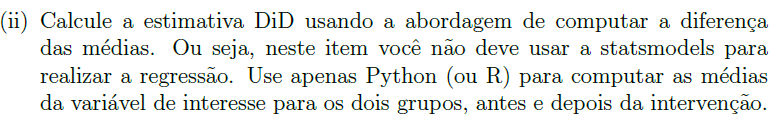

**Explicação**

## **(iii)**

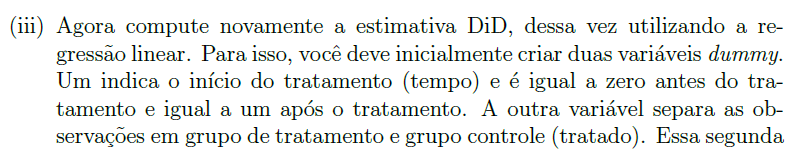
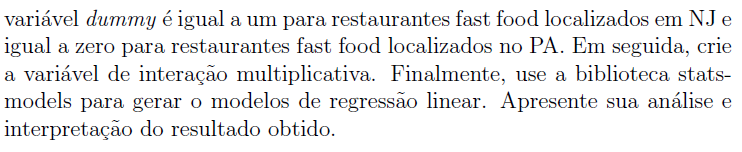

**Explicação**

# **4) DiD: validação**

## **(i)**

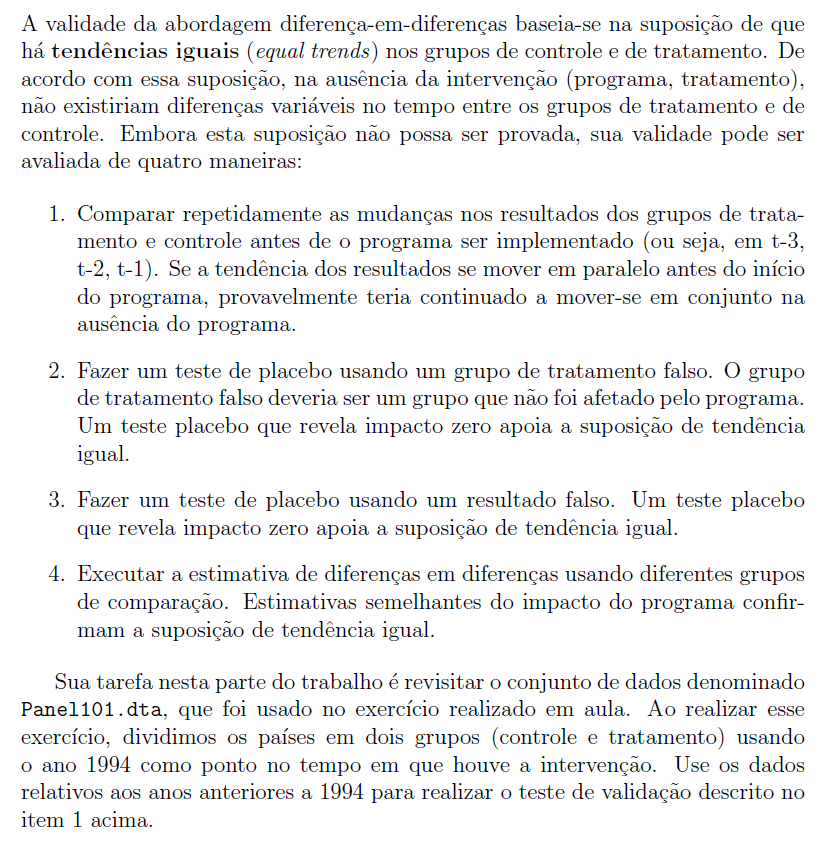

In [27]:
import pandas as pd
df = pd.read_stata('Panel101.dta')
df.head()

,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,1993,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,1994,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0


Média do grupo de controle no ano 1990 para x1: 0.28999999165534973
Média do grupo de controle no ano 1991 para x1: 0.5199999809265137
Média do grupo de controle no ano 1992 para x1: 0.6499999761581421
Média do grupo de controle no ano 1993 para x1: 0.5199999809265137
Média do grupo de controle no ano 1994 para x1: 0.8700000047683716
Média do grupo de tratamento no ano 1995 para x1: 0.699999988079071
Média do grupo de tratamento no ano 1996 para x1: 0.8199999928474426
Média do grupo de tratamento no ano 1997 para x1: 0.8100000023841858
Média do grupo de tratamento no ano 1998 para x1: 0.7400000095367432
Média do grupo de tratamento no ano 1999 para x1: 0.550000011920929


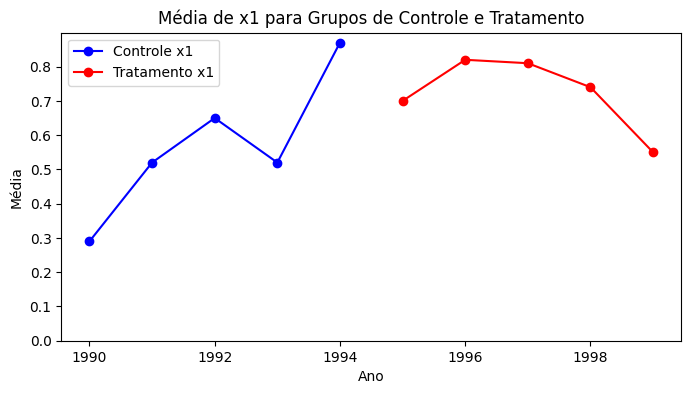

Média do grupo de controle no ano 1990 para x2: 0.09000000357627869
Média do grupo de controle no ano 1991 para x2: 0.18000000715255737
Média do grupo de controle no ano 1992 para x2: 0.12999999523162842
Média do grupo de controle no ano 1993 para x2: 0.09000000357627869
Média do grupo de controle no ano 1994 para x2: 0.25999999046325684
Média do grupo de tratamento no ano 1995 para x2: 0.10000000149011612
Média do grupo de tratamento no ano 1996 para x2: 0.15000000596046448
Média do grupo de tratamento no ano 1997 para x2: 0.14000000059604645
Média do grupo de tratamento no ano 1998 para x2: 0.07000000029802322
Média do grupo de tratamento no ano 1999 para x2: 0.12999999523162842


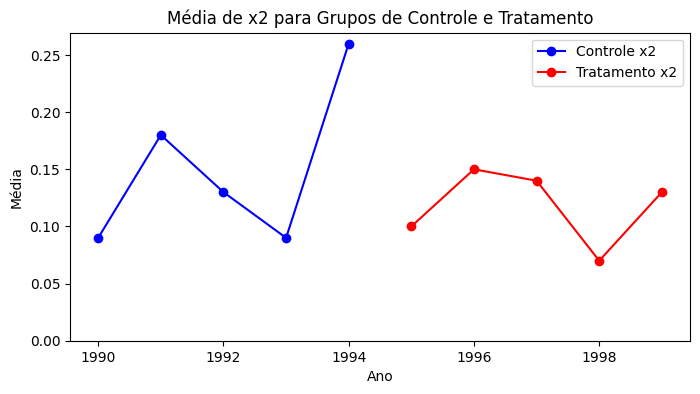

Média do grupo de controle no ano 1990 para x3: 0.6399999856948853
Média do grupo de controle no ano 1991 para x3: 0.6700000166893005
Média do grupo de controle no ano 1992 para x3: 0.5199999809265137
Média do grupo de controle no ano 1993 para x3: 0.3100000023841858
Média do grupo de controle no ano 1994 para x3: 0.3799999952316284
Média do grupo de tratamento no ano 1995 para x3: 0.6299999952316284
Média do grupo de tratamento no ano 1996 para x3: 0.7599999904632568
Média do grupo de tratamento no ano 1997 para x3: 0.6600000262260437
Média do grupo de tratamento no ano 1998 para x3: 1.2999999523162842
Média do grupo de tratamento no ano 1999 para x3: 1.75


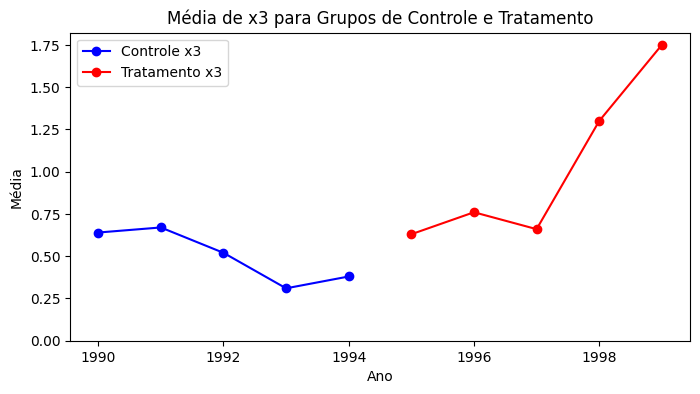

In [29]:
grupo_controle = df[df['year'] <= 1994]
grupo_tratamento = df[df['year'] > 1994]

variables = ['x1', 'x2', 'x3']

for variable in variables:
    means_controle_before_1994 = {}
    means_tratamento_after_1994 = {}

    # Antes de 1994
    for year in range(1990, 1995):
        mean_controle = grupo_controle[grupo_controle['year'] == year][variable].mean()
        mean_tratamento = grupo_tratamento[grupo_tratamento['year'] == year][variable].mean()
        means_controle_before_1994[year] = round(mean_controle, 2)
        print(f"Média do grupo de controle no ano {year} para {variable}: {means_controle_before_1994[year]}")

    # Depois de 1994
    for year in range(1995, 2000):
        mean_controle = grupo_controle[grupo_controle['year'] == year][variable].mean()
        mean_tratamento = grupo_tratamento[grupo_tratamento['year'] == year][variable].mean()
        means_tratamento_after_1994[year] = round(mean_tratamento, 2)
        print(f"Média do grupo de tratamento no ano {year} para {variable}: {means_tratamento_after_1994[year]}")

    years_controle_before_1994 = list(means_controle_before_1994.keys())
    means_controle_before_1994_values = list(means_controle_before_1994.values())

    years_tratamento_after_1994 = list(means_tratamento_after_1994.keys())
    means_tratamento_after_1994_values = list(means_tratamento_after_1994.values())

    plt.figure(figsize=(8, 4))
    plt.plot(years_controle_before_1994, means_controle_before_1994_values, marker='o', linestyle='-', color='blue', label=f'Controle {variable}')
    plt.plot(years_tratamento_after_1994, means_tratamento_after_1994_values, marker='o', linestyle='-', color='red', label=f'Tratamento {variable}')

    plt.ylim(bottom=0)
    plt.xlabel('Ano')
    plt.ylabel('Média')
    plt.title(f'Média de {variable} para Grupos de Controle e Tratamento')
    plt.legend()
    plt.show()

**Explicação**

- Carrego os dados em dois grupos, um para o controle e outro para o tratamento, com base no ano de corte 1994.
- Inicializo dois dicionários vazios para armazenar as médias do grupo controle antes de 1994 e do grupo de tratamento após 1994.
- Calculo as médias para cada ano no período antes de 1994 e após 1994 para ambos os grupos, armazenando os resultados nos respectivos dicionários.
- Extraio as chaves (anos) e os valores (médias) dos dicionários para preparar os dados para o gráfico.
- Crio um gráfico usando plot() para representar as médias do grupo controle antes de 1994 e do grupo de tratamento após 1994 ao longo dos anos.
- Adiciono rótulos aos eixos, um título ao gráfico e uma legenda para diferenciar os grupos representados no gráfico.